#FEATURE ENGINEERING MISSING VALUES

###Random sample imputation - second technique
Aim: random sample imputation consists of taking random observation from the dataset and we use this observation to replace the NaN values

when it should be used?
it assumes that the data are missing completely at random(MCAR)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving train (1).csv to train (1).csv


In [2]:
import pandas as pd
df=pd.read_csv('train (1).csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [4]:
df.isnull().mean()

,0
Survived,0.000000
Age,0.198653
Fare,0.000000


In [5]:
df['Age'].isnull().sum()

np.int64(177)

In [6]:
df['Age'].dropna()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
885,39.0
886,27.0
887,19.0
889,26.0


In [7]:
df['Age'].dropna().sample()

,Age
164,1.0


In [8]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)
#null value is dropped so that we can get the sample which is not null
#without random_state=0 the values will change

,Age
423,28.00
177,50.00
305,0.92
292,36.00
889,26.00
...,...
539,22.00
267,25.00
352,15.00
99,34.00


In [9]:
df[df['Age'].isnull()].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [10]:
def impute_nan(df,variable,median):
  df[variable+"_median"]=df[variable].fillna(median)
  df[variable+"_random"]=df[variable]
  #it will have the random sample to fill the na
  random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  #pandas needs to have same index in order to merge the dataset
  random_sample.index=df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [11]:
median=df.Age.median()

In [12]:
median

28.0

In [13]:
impute_nan(df,'Age',median)

In [14]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

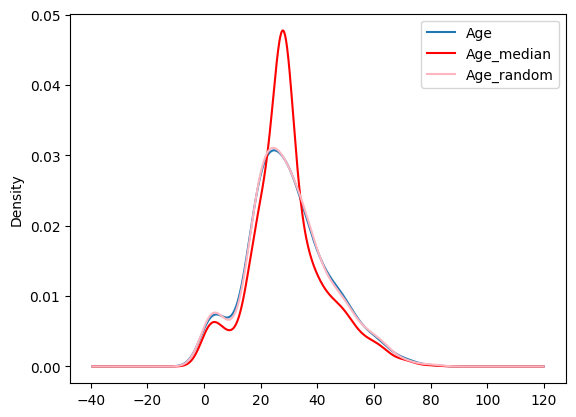

In [16]:
fig = plt.figure()
ax= fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red')
df.Age_random.plot(kind='kde',ax=ax,color='lightpink')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

###advantages of random sample imputation
easy to implement,there is less distortion in variance
###disadvantages of random sample imputation
in every situation randomness won't work

##Capturing NaN values with a new feature - third technique

used when it is Missing Data Not At Random (MNAR) case
it works well if the data are not missing completely at random

In [17]:
import pandas as pd
import numpy as np
df=pd.read_csv('train (1).csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [18]:
df['Age_NaN']=np.where(df['Age'].isnull(),1,0)
df.head(5)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [19]:
df.Age.mean()

np.float64(29.69911764705882)

In [20]:
df.Age.median()

28.0

In [21]:
df['Age'].fillna(df.Age.median(),inplace=True)
df.head(5)

/tmp/ipython-input-3362255603.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df.Age.median(),inplace=True)


,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


###advantages
easy to implement,captures the importance of missing values
###disadvantages
creating additional features (curse of dimensionality)

##End of Distribution Imputation

In [22]:
import pandas as pd
import numpy as np
df=pd.read_csv('train (1).csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

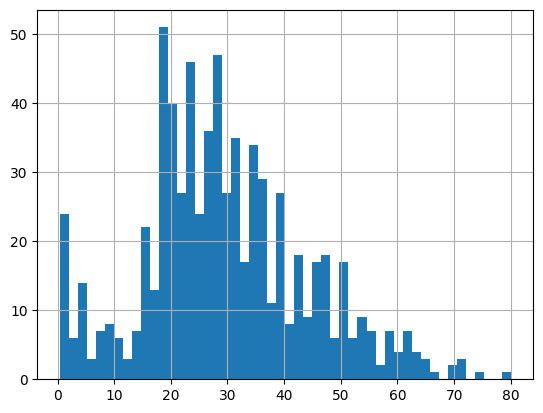

In [23]:
df.Age.hist(bins=50)

####whatever will be present at the end of the distribution in the plus three standard deviation that particular value is being taken and applied here.

In [28]:
extreme=df.Age.mean()+3*df.Age.std()

<Axes: xlabel='Age'>

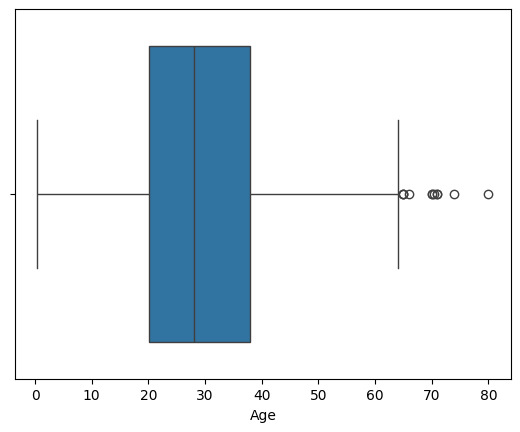

In [29]:
import seaborn as sns
sns.boxplot(x='Age',data=df)

In [32]:
def impute_nan(df,variable,median,extreme):
  df[variable+"_end_distribution"]=df[variable].fillna(extreme)
  df[variable].fillna(median,inplace=True)

In [34]:
impute_nan(df,'Age',df.Age.median(),extreme)

/tmp/ipython-input-4056351659.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[variable].fillna(median,inplace=True)


In [35]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<Axes: >

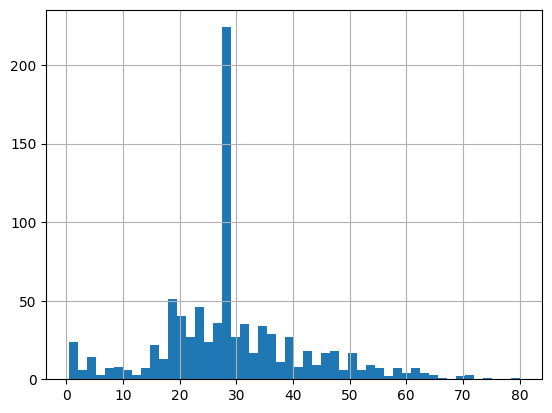

In [36]:
df['Age'].hist(bins=50)

<Axes: >

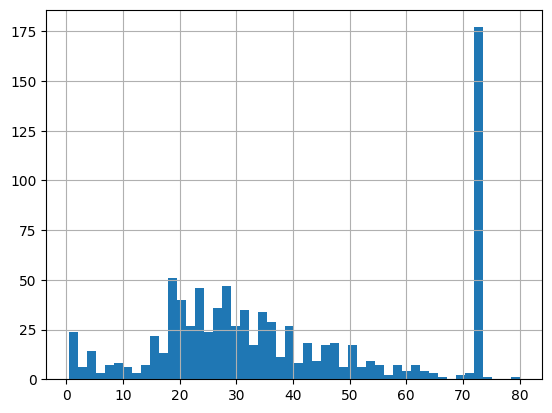

In [37]:
df['Age_end_distribution'].hist(bins=50)

<Axes: xlabel='Age_end_distribution'>

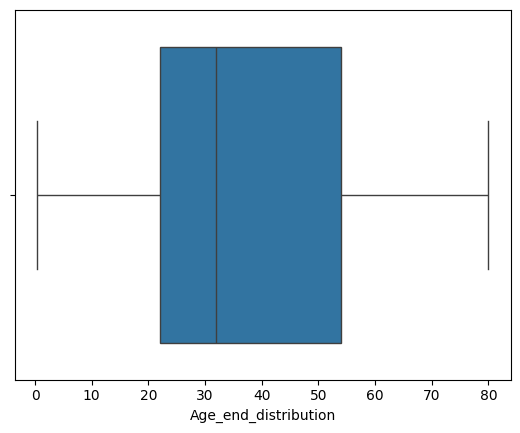

In [38]:
sns.boxplot(x='Age_end_distribution',data=df)

outliers has gone

###advantages of end of distribution imputation
easy to implement,captures the importance of missingness if there is one
###disadvantages
distorts the original distribution of the variable.if missingness is not important,it may mask the predictive power of the original variable by distorting its distribution.if the number of NA is big,it will mask true outliers in the distribution.if the number of NA is small,the replaced NA may be considered an outlier and pre-processed in a subsequent feature engineering